<a href="https://colab.research.google.com/github/ib1905/MIPT_Python_professional_development_program/blob/main/MIPT_Python_professional_development_program_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Filename: hst_05773_05_wfpc2_f502n_wf_drz.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     509   ()      
  1  SCI           1 ImageHDU       103   (2150, 2150)   float32   
  2  WHT           1 ImageHDU       124   (2150, 2150)   float32   
  3  CTX           1 ImageHDU       123   (2150, 2150)   int32   
None 

XTENSION= 'IMAGE   '           / Image extension                                BITPIX  =                  -32 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                 2150                                                  NAXIS2  =                 2150                                                  PCOUNT  =                    0 / number of parameters                           GCOUNT  =                    1 / number of groups                               CRVAL1  =    274.7173822566667 / right ascension of reference pixel (de

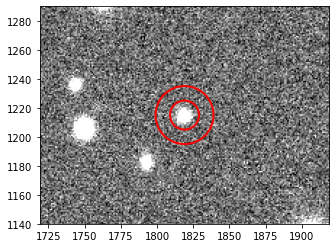

In [1]:
''' This project is intended to read data from a remote server via the Internet,
perform basic manipulation over it and provide some practical analysis, e.g.
defining the sum of pixels brightness within an arbitrary circle of an image '''

''' _tmp  realization steps:
1) Access data remotely
2) Analyse data in a consistent way
3) Save results in a file on a local PC '''

from astropy.io import fits
import matplotlib.pyplot as plt
import numpy

# first file for an introductory part of operations
fitsURL='hst_05773_05_wfpc2_f502n_wf_drz.fits'
hdulist=fits.open(fitsURL)

print(hdulist.info(),'\n')
print(hdulist[1].header,'\n')
print(hdulist[1].header['NAXIS1'],'\n')
print(hdulist[0].header['EXPTIME'],'\n')

#image data
imdata=hdulist[1].data

plt.clf()
plt.axes().set_aspect('equal')
plt.imshow(imdata,cmap='gray',clim=(numpy.percentile(imdata,1),numpy.percentile(imdata,99)))

#to retrieve a brightness value of some pixel
print(imdata[1400][1200])
#NB! Mind the coordinates order: imdata[y][x]

# another file to demonstrate additional operations on images
hdulistS=fits.open('frame-g-007923-5-0307.fits')
imdataS=hdulistS[0].data

lowerOne=numpy.percentile(imdataS,1)
upperOne=numpy.percentile(imdataS,99)

plt.clf()
plt.imshow(imdataS,cmap='gray',clim=(lowerOne,upperOne))
#plt.savefig('sdss-py.pdf',bbox_inches='tight')
#%%
centerX=1819
centerY=1215
plt.imshow(imdataS,cmap='gray',clim=(lowerOne,upperOne))
plt.xlim(centerX-100,centerX+100)
plt.ylim(centerY-75,centerY+75)

thisCircle=plt.Circle((centerX,centerY),10,color='r',fill=False,lw=2)
plt.gca().add_artist(thisCircle)
thisCircle=plt.Circle((centerX,centerY),20,color='r',fill=False,lw=2)
plt.gca().add_artist(thisCircle)
#%%
#defining the sum of pixel brightness in the outer circle
radiusOut=20
photCollector=numpy.array([])
for ii in range(centerX-radiusOut,centerX+radiusOut):
    for jj in range(centerY-radiusOut,centerY+radiusOut):
        distance=numpy.sqrt((ii-centerX)**2+(jj-centerY)**2)
        if distance < radiusOut:
            photCollector=numpy.append(photCollector,imdataS[jj][ii])
C1=numpy.sum(photCollector)
A1=len(photCollector)

#and now the inner circle
radiusIn=10
photCollector=numpy.array([])
for ii in range(centerX-radiusIn,centerX+radiusIn):
    for jj in range(centerY-radiusIn,centerY+radiusIn):
        distance=numpy.sqrt((ii-centerX)**2+(jj-centerY)**2)
        if distance < radiusIn:
            photCollector=numpy.append(photCollector,imdataS[jj][ii])
C2=numpy.sum(photCollector)
A2=len(photCollector)

print('Outer radius','brightness:',C1,'area:',A1)
print('Inner radius','brightness:',C2,'area:',A2)

l=C2-((C1-C2)/(A1-A2)*A2) #brightness formula
print('{:.2f}'.format(l))